# Project 2 - CNN for classification

In [3]:
import tensorflow as tf

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D , Dropout, Dense, Flatten
from tensorflow.keras.models import Model

In [21]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [25]:
cifar10 = tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
X_train,X_test=X_train/255.0,X_test/255.0
y_train,y_test=y_train.flatten(),y_test.flatten()
print('X_train.shape : ',X_train.shape)
print('y_train.shape : ',y_train.shape)

X_train.shape :  (50000, 32, 32, 3)
y_train.shape :  (50000,)


In [26]:
k = len(set(y_train))
print(" Number of Classes : ",k)

 Number of Classes :  10


In [27]:
i=Input(shape=X_train[0].shape)
x=Conv2D(32,(3,3),strides = 2,activation='relu')(i)
x=Conv2D(64,(3,3),strides = 2,activation='relu')(x)
x=Conv2D(128,(3,3),strides = 2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.5)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)

model=Model(i,x)

In [28]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
r=model.fit(X_train,y_train,validation_data=(X_test,y_test) ,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 48s 30ms/step - loss: 1.2904 - accuracy: 0.5317 - val_loss: 1.1270 - val_accuracy: 0.5986
Epoch 2/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1483 - accuracy: 0.5909 - val_loss: 1.0747 - val_accuracy: 0.6108
Epoch 3/15
1563/1563 [==============================] - 46s 30ms/step - loss: 1.0502 - accuracy: 0.6250 - val_loss: 0.9855 - val_accuracy: 0.6466
Epoch 4/15
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9793 - accuracy: 0.6506 - val_loss: 0.9341 - val_accuracy: 0.6764
Epoch 5/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9168 - accuracy: 0.6739 - val_loss: 0.9606 - val_accuracy: 0.6588
Epoch 6/15
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8585 - accuracy: 0.6945 - val_loss: 0.9105 - val_accuracy: 0.6856
Epoch 7/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8116 - accuracy: 0.7122 - val_loss: 0.8543 -

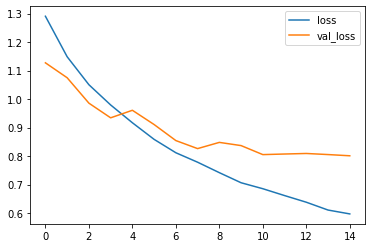

In [32]:

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

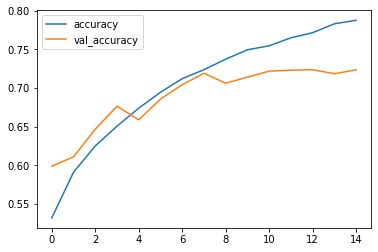

In [33]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [35]:
print(model.evaluate(X_test,y_test))

313/313 [==============================] - 3s 9ms/step - loss: 0.8010 - accuracy: 0.7235
[0.8009612560272217, 0.7235000133514404]


In [37]:
from sklearn.metrics import confusion_matrix
import pandas as pd
p_test=model.predict(X_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
print(cm)

[[758  14  41  18  20  11  13  14  76  35]
 [ 18 824   7   5   1   4  15   5  31  90]
 [ 56   5 617  44 102  62  72  21  15   6]
 [ 20   6  70 417  84 218 127  27  17  14]
 [ 16   1  77  31 721  29  73  38  12   2]
 [  7   5  58 115  68 642  52  37   8   8]
 [  3   5  34  30  41  13 861   7   6   0]
 [ 11   2  38  35  82  73  15 729   2  13]
 [ 42  29  10  14   5   6  14   8 854  18]
 [ 34  72   6  16   7   9   9  11  24 812]]


In [39]:
df=pd.DataFrame(y_test,columns=['y_actual'])
df1=pd.DataFrame(p_test,columns=['y_predicted'])
df['y_predicted']=df1['y_predicted']
df.head(10)

,y_actual,y_predicted
0,3,5
1,8,8
2,8,8
3,0,0
4,6,6
5,6,6
6,1,9
7,6,6
8,3,3
9,1,1


In [40]:
import seaborn as sns

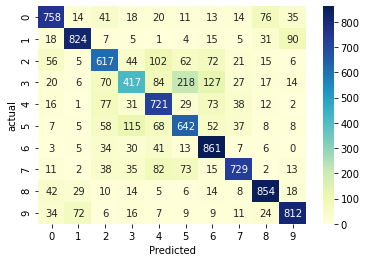

In [41]:
confusion_matrix=pd.crosstab(df['y_actual'],df['y_predicted'],rownames=['actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap='YlGnBu')
plt.show()

In [42]:
labels= '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: truck Predicted: automobile')

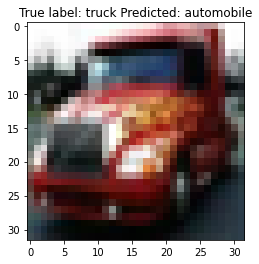

In [46]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title('True label: %s Predicted: %s'%(labels[y_test[i]],labels[p_test[i]]))